In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

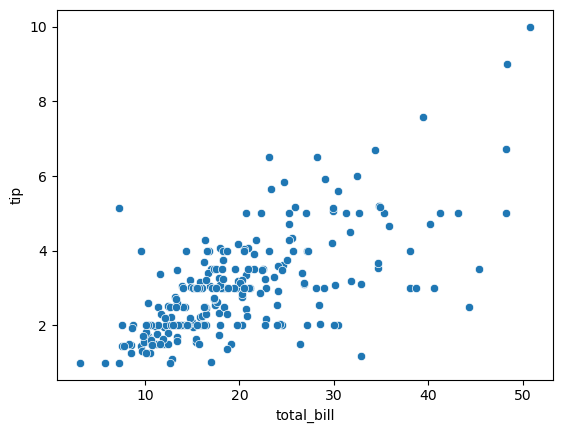

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [11]:
# Splitting variables
x = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:2]  # dependent

In [13]:
#Split into Train/Test sets
# Splitting dataset into test/train
#test size 0.2 means 20% data will be used as test
#Random state locks the pattren for train and test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=40)


In [14]:
x_train

,total_bill
26,13.37
167,31.71
222,8.58
121,13.42
229,22.12
...,...
184,40.55
165,24.52
7,26.88
219,30.14


In [15]:
y_train

,tip
26,2.00
167,4.50
222,1.92
121,1.68
229,2.88
...,...
184,3.00
165,3.48
7,3.12
219,3.09


In [17]:
# call the model
model = LinearRegression()
# train the model
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [28]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

[1.01940432]
[[0.09807813]]
y =  [1.01940432] + [[0.09807813]] * X


In [29]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  1.3189378567836194
R2 =  0.5233207343373031
RMSE =  1.1484501977811747


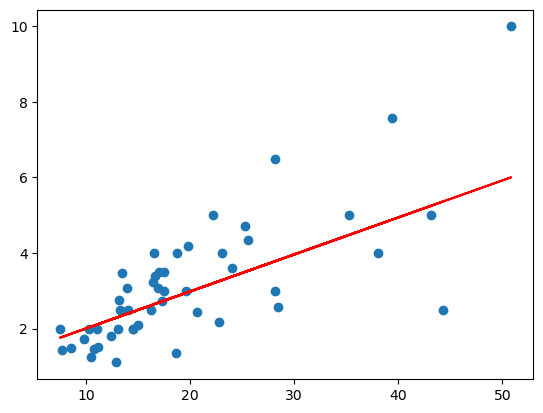

In [30]:
# plot the model and data
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()